![Titanic](./Titanic.jpg)  
*RMS Titanic.  Photograph by F.G.O. Stuart, 1912*

# Titanic: Machine Learning from Disaster

#### By Matthew Prout

## Overview

The purpose of this notebook is to develop a model which can predict whether a passenger would survive the sinking of the Titanic.

* First exploratory data analysis will be performed to understand the data.  This will help determine features that may be useful for model building.
* Next, the data is cleaned and features are built as necessary.
* Finally, predictive models are built.

Homepage: https://www.kaggle.com/c/titanic

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

## Titanic Exploratory Data Analysis (EDA)

In [6]:
train_df = pd.read_csv('train.csv')

### Summary Statistics

In [7]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Newell, Miss. Marjorie",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


There are 12 different features and 891 rows.

See if there is any missing data:

In [8]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

* The 'Age', 'Cabin', and 'Embarked' features have missing data.

To compare those who survived with those who died, create data frames for the two groups to make the EDA easier:

In [9]:
died_df = train_df[train_df.Survived == 0]
survived_df = train_df[train_df.Survived == 1]

### Passenger ID (PassengerId)

Based on the count, there are 891 passengers.

### Passenger Class (Pclass)

This is the ticket class:

| Number | Class |
| ------ | ----- |
| 1 | 1st |
| 2 | 2nd |
| 3 | 3rd |

Plot distributions of those who survived based on Passenger Class:  
Resources:  
https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

In [10]:
died_class_dist = died_df.Pclass.value_counts(sort=False)
surv_class_dist = survived_df.Pclass.value_counts(sort=False)

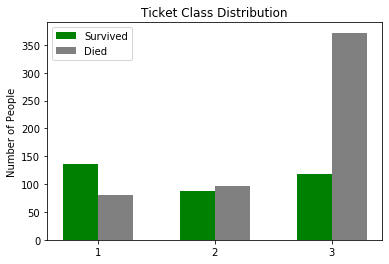

In [11]:
ind = np.arange(3) + 1
width = 0.3
plt.figure()
plt.bar(ind-width/2, list(surv_class_dist), width, color='green')
plt.bar(ind+width/2, list(died_class_dist), width, color='gray')

plt.ylabel('Number of People')
plt.title('Ticket Class Distribution')
plt.xticks(ind)
plt.legend(('Survived', 'Died'))

plt.show()

We can see that:

* More first class passengers survived than died.
* Proportionally more third class passengers died than survived.
* About an equal number of people from each class survived.

### Sex

Plot distributions of those who survived based on Sex:  
Resources:  
https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/categorical_variables.html

In [12]:
died_sex_dist = died_df.Sex.value_counts(sort=False)
surv_sex_dist = survived_df.Sex.value_counts(sort=False)

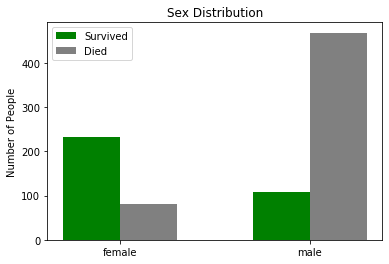

In [13]:
ind = np.arange(len(surv_sex_dist.index)) + 1
width = 0.3
plt.figure()
plt.bar(ind-width/2, list(surv_sex_dist), width, color='green')
plt.bar(ind+width/2, list(died_sex_dist), width, color='gray')

plt.ylabel('Number of People')
plt.title('Sex Distribution')
plt.xticks(ind, surv_sex_dist.index)
plt.legend(('Survived', 'Died'))

plt.show()

We can see that:

* There were almost twice as many men as there were women on board the Titanic.
* More women than men survived.
* A greater proportion of women survived than men.

### Age

Plot distributions of those who survived based on Age:  

Resources:  
https://stackoverflow.com/questions/45273731/binning-column-with-python-pandas  
https://stackoverflow.com/questions/48157735/plot-multiple-bars-for-categorical-data

In [14]:
bins = np.arange(0,105,5)
labels = [str(val) for val in bins[1:]]

died_age_dist = died_df.groupby(pd.cut(died_df.Age, bins=bins)).size()
surv_age_dist = survived_df.groupby(pd.cut(survived_df.Age, bins=bins)).size()

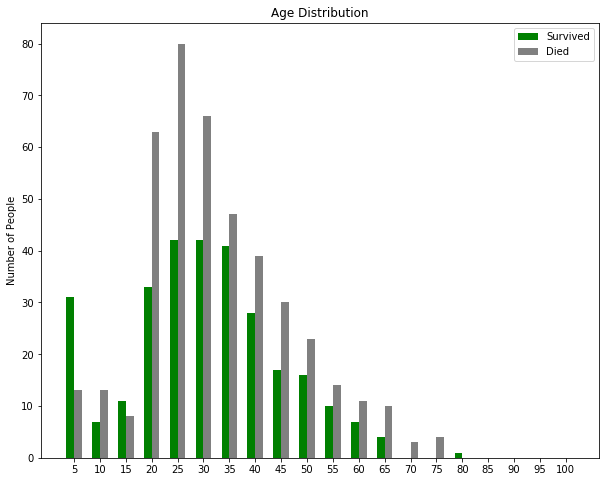

In [15]:
ind = np.arange(len(bins)-1)
width = 0.3
plt.figure(figsize=(10,8))
plt.bar(ind-width/2, list(surv_age_dist), width, color='green')
plt.bar(ind+width/2, list(died_age_dist), width, color='gray')

plt.ylabel('Number of People')
plt.title('Age Distribution')
plt.xticks(np.arange(len(labels)), labels)
plt.legend(('Survived', 'Died'))

plt.show()

We can see that:

* Children tended to survive at the highest rate.  
* Young adults and middle ages people, ages [20, 35], had the highest **number** of fatalities, due to the size of this group.
* Survival rates for older adults was about the same.

One problem with this plot is that it is hard to see the proportion of those who survived by age group, which is helpful in understanding whether age is predictive of surviving the disaster.  
Here is a plot of the **proportion** of those who survived per age group:

In [16]:
# Find totals per age category
age_cat_total = np.array(list(surv_age_dist)) + np.array(list(died_age_dist))

# Remove categories that are 0 to prevent divide-by-zero
age_cat_zero = np.where(age_cat_total == 0)

# Calculate survived percentage per category
age_cat_survived_percent = np.array(list(surv_age_dist[:age_cat_zero[0][0]])) / age_cat_total[:age_cat_zero[0][0]]

age_cat_survived_indicies = bins[1:age_cat_zero[0][0]+1]
age_cat_survived_labels = labels[:age_cat_zero[0][0]]

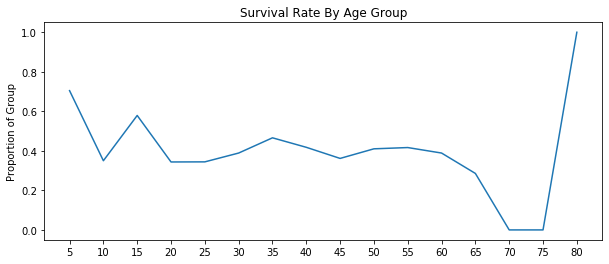

In [17]:
plt.figure(figsize=(10,4))
plt.plot(age_cat_survived_indicies, age_cat_survived_percent)

plt.ylabel('Proportion of Group')
plt.title('Survival Rate By Age Group')
plt.xticks(age_cat_survived_indicies, age_cat_survived_labels)

plt.show()

We can see that age is not very influential in determining whether someone survives, as the survival rate is relatively constant by age, except for the very young (less than 5 years old).  
The survival rate for the very old fluctuates due to the small sample size.

Find number of missing values for age:

In [18]:
missing_age = sum(train_df.Age.isnull())
print('There are {} missing age values, which is: {:2.1f}%'.format(missing_age, missing_age/train_df.shape[0]*100))

There are 177 missing age values, which is: 19.9%


The number of missing values for age is nearly 20%, so this feature may not be useful in the model due to the amount of missing data.

### Siblings / Spouses (SibSp)

Plot distributions of those who survived based on those who had siblings / spouses:

In [19]:
died_sibsp_dist = died_df.SibSp.value_counts(sort=False)
surv_sibsp_dist = survived_df.SibSp.value_counts(sort=False)

In [20]:
temp_died = [0]*9
temp_surv = [0]*9

for index, value in died_sibsp_dist.items():
    temp_died[index] = value
for index, value in surv_sibsp_dist.items():
    temp_surv[index] = value
    
died_sibsp_dist = temp_died
surv_sibsp_dist = temp_surv

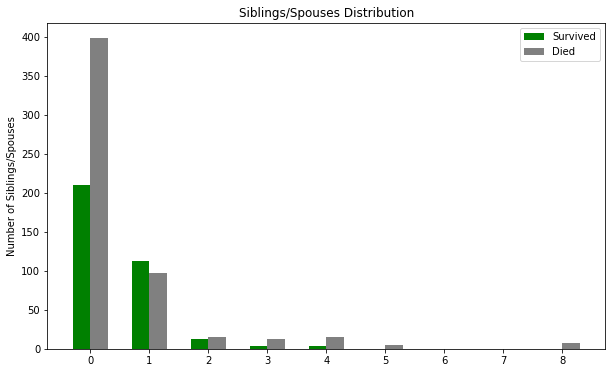

In [21]:
ind = np.arange(9)
width = 0.3
plt.figure(figsize=(10,6))
plt.bar(ind-width/2, list(surv_sibsp_dist), width, color='green')
plt.bar(ind+width/2, list(died_sibsp_dist), width, color='gray')

plt.ylabel('Number of Siblings/Spouses')
plt.title('Siblings/Spouses Distribution')
plt.xticks(ind)
plt.legend(('Survived', 'Died'))

plt.show()

We can see that:

* For those who had no siblings/spouses, there was a greater chance that they died than those who had one or more siblings/spouses.

### Parents / Children (Parch)

Plot distribution of those who survived for those who had parents or children:

In [22]:
died_parch_dist = died_df.Parch.value_counts(sort=False)
surv_parch_dist = survived_df.Parch.value_counts(sort=False)

In [23]:
temp_died = [0]*7
temp_surv = [0]*7

for index, value in died_parch_dist.items():
    temp_died[index] = value
for index, value in surv_parch_dist.items():
    temp_surv[index] = value
    
died_parch_dist = temp_died
surv_parch_dist = temp_surv

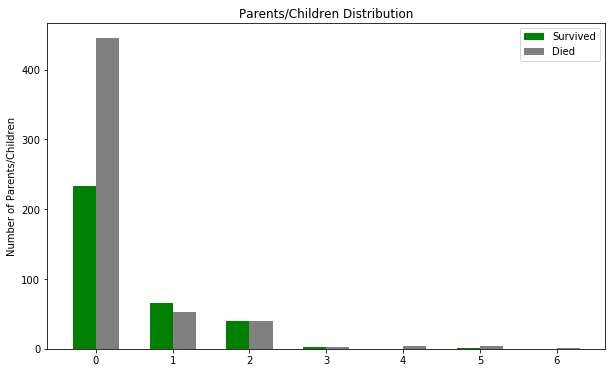

In [24]:
ind = np.arange(7)
width = 0.3
plt.figure(figsize=(10,6))
plt.bar(ind-width/2, list(surv_parch_dist), width, color='green')
plt.bar(ind+width/2, list(died_parch_dist), width, color='gray')

plt.ylabel('Number of Parents/Children')
plt.title('Parents/Children Distribution')
plt.xticks(ind)
plt.legend(('Survived', 'Died'))

plt.show()

We can see that:

* For those who had no parents or children, there was a greater chance that they died than those who had one or more parents / children.  
* The distribution is similar to that for siblings / spouses (previous plot).

### Fare

Plot distribution of those who survived based on the fare:

In [25]:
bins = np.arange(0,600,50)
labels = [str(val) for val in bins[1:]]

died_fare_dist = died_df.groupby(pd.cut(died_df.Fare, bins=bins)).size()
surv_fare_dist = survived_df.groupby(pd.cut(survived_df.Fare, bins=bins)).size()

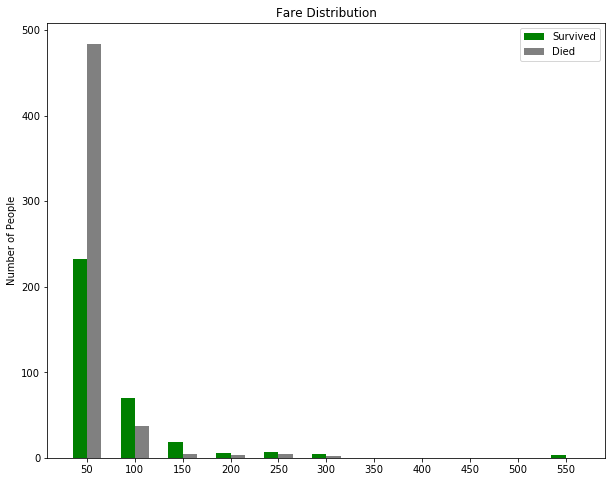

In [26]:
ind = np.arange(len(bins)-1)
width = 0.3
plt.figure(figsize=(10,8))
plt.bar(ind-width/2, list(surv_fare_dist), width, color='green')
plt.bar(ind+width/2, list(died_fare_dist), width, color='gray')

plt.ylabel('Number of People')
plt.title('Fare Distribution')
plt.xticks(np.arange(len(labels)), labels)
plt.legend(('Survived', 'Died'))

plt.show()

We can see that:

* Most of the fares are less than $50  
* Passengers with the lowest fares had a higher chance of dying than those with higher priced fares

### Cabin

Find number of NA values:

In [27]:
missing_cabin = sum(train_df.Cabin.isnull())
print('There are {} missing cabin values, which is: {:2.1f}%'.format(missing_cabin, missing_cabin/train_df.shape[0]*100))

There are 687 missing cabin values, which is: 77.1%


The Cabin feature has too many missing values to be useful, so it will be removed from the analysis.

### Embarked

Plot distribution of those who survived based on where they embarked:

In [28]:
died_embarked_dist = died_df.Embarked.value_counts(sort=False)
surv_emarked_dist = survived_df.Embarked.value_counts(sort=False)

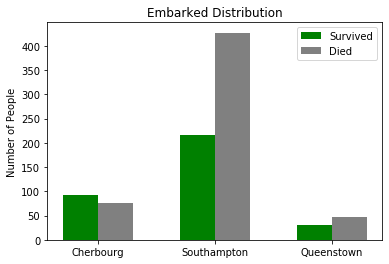

In [29]:
ind = np.arange(len(surv_emarked_dist.index)) + 1
width = 0.3
plt.figure()
plt.bar(ind-width/2, list(surv_emarked_dist), width, color='green')
plt.bar(ind+width/2, list(died_embarked_dist), width, color='gray')

plt.ylabel('Number of People')
plt.title('Embarked Distribution')

mapping = {'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}

plt.xticks(ind, [mapping[val] for val in surv_emarked_dist.index])
plt.legend(('Survived', 'Died'))

plt.show()

Surprisingly, those who embarked from Southampton had a much higher chance of dying than those who boarded from Cherbourg or Queenstown.  
Note that this is probably a spurious correlation, as we can assume that people from the different cities have the same ability to get on a life raft and survive on one.

Find number of NA values

In [30]:
sum(train_df.Embarked.isnull())

2

### Correlations

A correlation diagram will be used to determine how correlated each *numerical* feature is with the Survived feature:

In [31]:
corr_df = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

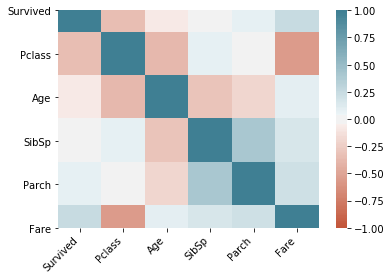

In [32]:
import seaborn as sns

ax = sns.heatmap(
    corr_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Correlation observations:

1. Survived is positively correlated with Fare and negatively correlated with Pclass.  It is weakly positively correlated with Age.
2. Pclass and Fare are highly negatively correlated based on the above visualization.  The two features are not independent, as higher class tickets (moving toward 1 - i.e. 1st class) cost more (higher fare).
3. Pclass is negatively correlated with Age. This is probably due to how wealth is accumulated with age, or how people's travel preferences change with age.  It is also slightly positively correlated with SibSp.
4. Age is slightly negatively correlated with SibSp, which may be due to the fact that people tend to be single the older they are due to the death of a spouse.
5. SibSp is slightly positively correlated with Parch, which is intuitive, as (a) children (siblings) travel with parents and (b) spouses travel with children.
6. Parch is slightly positively correlated with Fare, which may be due to the fact that people with children are less likely to travel 1st class.

## Feature Engineering

Feature engineering needs to be performed the same way on test data as it is on the training data.

In [33]:
test_df = pd.read_csv('test.csv')

In [34]:
#test_df.describe(include='all')

### Missing Data in Train and Test Data

In the training data, Age and Embarked both have missing data.  Age is missing 177 values (~20%), and Embarked is missing 2 values (.2%).  

There are so few missing values for Embarked that the method used to handle it probably will not make much of a difference.  I choose to impute them with the mode value:

In [35]:
import statistics
mode_val = statistics.mode(train_df.Embarked)
train_df.Embarked.fillna(mode_val, inplace=True)

For dealing with the missing values for Age, a couple techniques can be tried. First, the age can be imputed based on Sex, or Sex and Pclass. Second, since there is so much missing data, the feature can be dropped from the models.

In [36]:
sex_pclass_group = train_df.groupby(['Sex','Pclass'])
sex_pclass_group.mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [37]:
def getAgeForSexPclass(sex, pclass):
    grp = sex_pclass_group.get_group((sex, pclass))
    return round(grp.mean()['Age'])

def imputeAge(df):
    for idx, row in df.iterrows():
        if pd.isna(row['Age']):
            df.at[idx, 'Age'] = getAgeForSexPclass(row['Sex'], row['Pclass'])
            
imputeAge(train_df)
imputeAge(test_df)

In the test data, Fare has one missing value:

In [38]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


 This value can be imputed using the mean value for the passenger class (Pclass):

In [39]:
pclass_group = train_df.groupby(['Pclass'])
pclass_group.mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.367685,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.922989,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.227943,0.615071,0.393075,13.675550


The missing value is for Pclass 3, which has a mean Fare of 13.68.  Use this value when imputing:

In [40]:
test_df.at[152, 'Fare'] = round(pclass_group.get_group((3)).mean()['Fare'],2)

### Unused Columns

The following columns will not be used: PassengerId, Name, Ticket, and Cabin.

In [41]:
train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Save PassengerId series for sending predictions to Kaggle
test_passenger_id = test_df['PassengerId']

test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

### Categorical Data

Convert the categorical values 'Sex' and 'Embarked' to dummy values for logistic regression:

In [42]:
train_df = pd.get_dummies(data=train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=['Sex', 'Embarked'], drop_first=True)

### Scale Data for Gradient Descent

Normalize the data for gradient descent for the L2 logistic regression model:

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = train_df['Survived'].ravel()
train_df.drop(columns=['Survived'], inplace=True)
X = scaler.fit_transform(train_df.loc[:,'Pclass':'Embarked_S'])

## Titanic Model Building

### Logistic Regression

#### Logistic Regression Assumptions:
1. Dependent variable is a categorical variable.  
This is true: the dependent variable is whether the person survived or not (True/False)  

2. The observations are independent (random sample).  
This may not be true.  Passengers were not independently sampled from the population, but purchased tickets on their own, so this assumption may not hold.  

3. No multicollinearity among the independent variables.  
As noted above, Fare and Pclass may not be independent.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#### Model 1: Logistic Regression using L1 Regularization

In [45]:
# Try a range of inverse regularization values
C_values = [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 3.0]
accuracy_scores = []

for C in C_values:
    clf = LogisticRegression(penalty='l1', C=C, solver='liblinear')
    scores = cross_val_score(clf, X, y, cv=5)
    accuracy_scores.append(scores.mean())

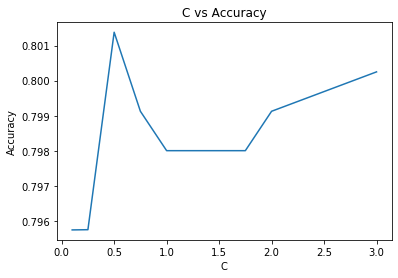

In [46]:
plt.plot(C_values, accuracy_scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')
plt.show()

In [47]:
highest_idx = np.argmax(accuracy_scores)
print('The best accuracy is at: {:.2f} with a C value of: {}'.format(accuracy_scores[highest_idx], C_values[highest_idx]))

The best accuracy is at: 0.80 with a C value of: 0.5


#### Model 2: Logistic Regression using L2 Regularization

In [48]:
# Try a range of inverse regularization values
C_values = [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 3.0, 4.0]
accuracy_scores = []

for C in C_values:
    clf = LogisticRegression(penalty='l2', C=C, solver='lbfgs')
    scores = cross_val_score(clf, X, y, cv=5)
    accuracy_scores.append(scores.mean())

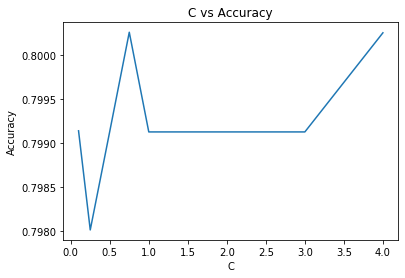

In [49]:
plt.plot(C_values, accuracy_scores)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')
plt.show()

In [50]:
highest_idx = np.argmax(accuracy_scores)
print('The best accuracy is at: {:.2f} with a C value of: {}'.format(accuracy_scores[highest_idx], C_values[highest_idx]))

The best accuracy is at: 0.80 with a C value of: 0.75


#### Logistic Regression Conclusion

The best L1 and L2 logistic regression models have the same accuracy (0.80) using cross validation.

### Random Forest

The next model I will use is random forest. For this model, I will look at the OOB score and search over the following parameters:  
1. n_estimators (12, 25, 50, 75, 100, 125, 150)  
2. max_depth (5, 10, 15, None)  

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
max_features = [1, 2, 3, 4, 5, 6, 7, 'auto']
n_estimators = [12, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150]
accuracy_scores = []

for num_feature in max_features:
    result = []
    for num_estimator in n_estimators:
        clf = RandomForestClassifier(n_estimators=num_estimator, max_features=num_feature)
        scores = cross_val_score(clf, train_df, y, cv=5)
        result.append(scores.mean())
    accuracy_scores.append(result)

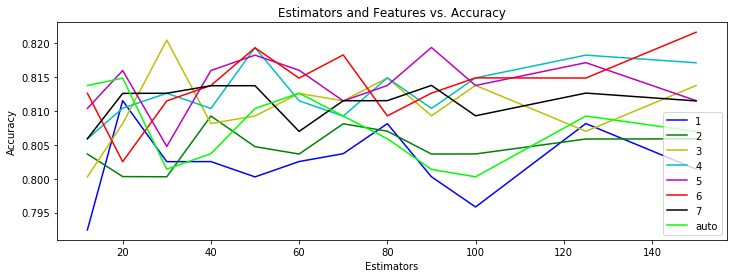

In [53]:
colors = ['b', 'g', 'y', 'c', 'm', 'r', 'k', 'lime']

plt.figure(figsize=(12,4))

for idx, val in enumerate(max_features):
    plt.plot(n_estimators, accuracy_scores[idx], c=colors[idx], label=max_features[idx])

plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Estimators and Features vs. Accuracy')    
plt.legend(loc='lower right')
plt.show()

Determine the average accuracy of different numbers of features:

In [54]:
for idx, arr in enumerate(accuracy_scores):
    print('{} features: {}'.format(max_features[idx], statistics.mean(accuracy_scores[idx])))

1 features: 0.8024474218560953
2 features: 0.8046779035674207
3 features: 0.8107673262791362
4 features: 0.8129187860643375
5 features: 0.8140439449268095
6 features: 0.8138556623839555
7 features: 0.8113264731224971
auto features: 0.8074863928847581


#### Random Forest Conclusion

The random forest model that had the highest mean accuracy across the different number of estimators was the model that used 5 features, with a mean accuracy of 0.814.

In [55]:
print('For this model, the hightest accuracy: {:.3f} was achieved with: {} estimators'.format(max(accuracy_scores[5]), n_estimators[np.argmax(accuracy_scores[5])]))

For this model, the hightest accuracy: 0.822 was achieved with: 150 estimators


#### Feature Importances

Let's look at the important features that the random forest classifier found:

In [56]:
clf = RandomForestClassifier(n_estimators=20, max_features=6)
clf.fit(train_df, y)

rf_feature_importances = clf.feature_importances_
rf_feature_importance_names = list(train_df.columns[np.argsort(rf_feature_importances)[::-1]])
rf_feature_importance_values = rf_feature_importances[np.argsort(rf_feature_importances)[::-1]]
rf_feature_importance_df = pd.DataFrame({'Feature': rf_feature_importance_names, 'Value': rf_feature_importance_values})

In [57]:
rf_feature_importance_df[rf_feature_importance_df.Value > 0.01]

,Feature,Value
0,Sex_male,0.306033
1,Fare,0.248953
2,Age,0.243544
3,Pclass,0.092588
4,SibSp,0.052383
5,Parch,0.025270
6,Embarked_S,0.021811


From this we see that Sex, Fare, Age, and Pclass are the most important features when it comes to determining survial.

### XGBoost

For the last model I will use XGBoost:

In [58]:
import xgboost as xgb

In [59]:
dtrain = xgb.DMatrix(train_df, label=y)
dtest = xgb.DMatrix(test_df)
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
num_round = 125

In [60]:
res = xgb.cv(param, dtrain, num_round, nfold=5,
       metrics={'error'}, seed=0)

Display the binary classification error rate:

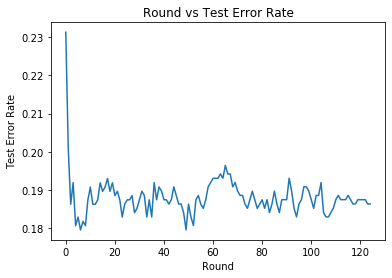

In [61]:
plt.plot(res.index, res['test-error-mean'])
#plt.plot(res.index, res['train-error-mean'])
plt.xlabel('Round')
plt.ylabel('Test Error Rate')
plt.title('Round vs Test Error Rate')
plt.show()

In [71]:
min_error = min(res['test-error-mean'])
idx_min_error = list(res['test-error-mean']).index(val)
print('The lowest test error rate is {:.1f}% at iteration {}.'.format(min_error*100, idx_min_error))

The lowest test error rate is 18.0% at iteration 6.


In [72]:
bst = xgb.train(param, dtrain, 6)
ypred = bst.predict(dtest)

In [73]:
predictions_xboost = [1 if val>0.5 else 0 for val in ypred]

## Titanic Predictions

The random forest model out-performed logistic regression under cross validation, so logistic regression will not be used for prediction:

In [153]:
# Note: parameters from an earlier run of the notebook
clf = RandomForestClassifier(n_estimators=40, max_features=6)
clf.fit(train_df, y)
predictions_randomforest = clf.predict(test_df)

In [154]:
prediction_df = pd.DataFrame( {'PassengerId':test_passenger_id, 'Survived': predictions_randomforest} )
prediction_df.to_csv('predictions_randomforest.csv', index = False)

This had a score of 0.75119 on Kaggle

Also save the predictions for XGBoost for comparison:

In [155]:
prediction_df = pd.DataFrame( {'PassengerId':test_passenger_id, 'Survived': predictions_xboost} )
prediction_df.to_csv('predictions_xgboost.csv', index = False)

This had a score of 0.75598 on Kaggle